# Machine Learning Version 03

## Prediction of Calving Day and Day before calving

### Libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import itertools 
import warnings 
warnings.filterwarnings(action='ignore')
from datetime import datetime
import os 
import re

## Loading data set

In [2]:
# Loading the data set
df = pd.read_csv('calving_data_version_03.csv')

## Basic data manipulation

In [3]:
# First five rows of data
df.head()

,Date,Calving Date,Calving Time,Insemination Date,Days Pregnancy,Days Pregnancy 1,Expected Calving Days,Expected Calving Days 1,Heat Indicator,Cow ID,...,Activity,Rest Time,Rest Per Bout,Restlessness Ratio,Manner Of Calving,Offspring,Parity,Days Before Calving,Hours Before Calving,Calved
0,10-Dec-21,24-Dec-21,8:04,16-Mar-21,269,269.0,11,11,8,3,...,141,735,29,1.7,Normal,1,multiparous,-14,-360,0
1,11-Dec-21,24-Dec-21,8:04,16-Mar-21,270,270.0,10,10,-2,3,...,131,827,32,1.5,Normal,1,multiparous,-13,-336,0
2,12-Dec-21,24-Dec-21,8:04,16-Mar-21,271,271.0,9,9,8,3,...,144,660,31,2.1,Normal,1,multiparous,-12,-312,0
3,13-Dec-21,24-Dec-21,8:04,16-Mar-21,272,272.0,8,8,-2,3,...,134,724,31,1.9,Normal,1,multiparous,-11,-264,0
4,14-Dec-21,24-Dec-21,8:04,16-Mar-21,273,273.0,7,7,-6,3,...,129,742,31,1.9,Normal,1,multiparous,-10,-240,0


In [4]:
# Shape of the data set
df.shape

(4455, 25)

## Cleaning section

In [5]:
# Replace non-numeric values
df = df.replace("--", np.nan, regex=True)
df = df.replace(r'^\s*$', np.nan, regex=True)

In [6]:
# Missing values inside the dataset
df.isnull().sum().sort_values(ascending=False) 

Days Pregnancy 1              1613
Restlessness Ratio               2
Rest Per Bout                    2
Rest Time                        2
Date                             0
Lact No                          0
Hours Before Calving             0
Days Before Calving              0
Parity                           0
Offspring                        0
Manner Of Calving                0
Activity                         0
Lactation No                     0
Breed                            0
Calving Date                     0
Calving Season                   0
Month of Sensor Attachment       0
Cow ID                           0
Heat Indicator                   0
Expected Calving Days 1          0
Expected Calving Days            0
Days Pregnancy                   0
Insemination Date                0
Calving Time                     0
Calved                           0
dtype: int64

## Visulization of NAN

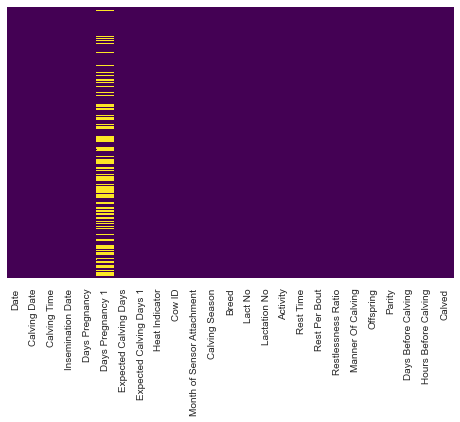

In [7]:
# Setting the background style for chart
sns.set_style('white')
# Setting the figure size
sns.set(rc={'figure.figsize':(8,5)})
# Generating the heatmap to check the NAN values inside the dataset
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
# Setting the x ticks for chart
plt.xticks(fontsize=10, rotation='vertical')
# Show the chart
plt.show()

In [8]:
# verifying missing values inside the dataset
df.isnull().sum().sort_values(ascending=True)

Date                             0
Days Before Calving              0
Parity                           0
Offspring                        0
Manner Of Calving                0
Activity                         0
Lactation No                     0
Lact No                          0
Hours Before Calving             0
Calving Season                   0
Breed                            0
Cow ID                           0
Heat Indicator                   0
Expected Calving Days 1          0
Expected Calving Days            0
Days Pregnancy                   0
Insemination Date                0
Calving Time                     0
Calving Date                     0
Month of Sensor Attachment       0
Calved                           0
Rest Time                        2
Rest Per Bout                    2
Restlessness Ratio               2
Days Pregnancy 1              1613
dtype: int64

# Imputation of missing values

## Libraries

In [9]:
# Importing libraries
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer 
from sklearn.impute import SimpleImputer 
from sklearn.ensemble import RandomForestRegressor 

In [10]:
# Variables containing NAN values
columns_with_missing_values = ['Rest Time', 'Rest Per Bout', 'Restlessness Ratio']

# Creating multiple imputation techniques to impute columns with missing values
imputer_mice = IterativeImputer(estimator=RandomForestRegressor(), random_state=0)
df[columns_with_missing_values] = imputer_mice.fit_transform(df[columns_with_missing_values])

In [11]:
# Verfying the missing values after imputating of missing values through iterative imputer
df.isnull().sum().sort_values() 

Date                             0
Days Before Calving              0
Parity                           0
Offspring                        0
Manner Of Calving                0
Restlessness Ratio               0
Rest Per Bout                    0
Rest Time                        0
Activity                         0
Lactation No                     0
Lact No                          0
Hours Before Calving             0
Breed                            0
Month of Sensor Attachment       0
Cow ID                           0
Heat Indicator                   0
Expected Calving Days 1          0
Expected Calving Days            0
Days Pregnancy                   0
Insemination Date                0
Calving Time                     0
Calving Date                     0
Calving Season                   0
Calved                           0
Days Pregnancy 1              1613
dtype: int64

## Conversion of data types

In [12]:
# Conversion of data types into proper data type
df['Date'] = pd.to_datetime(df['Date'])
df['date'] = df['Date'].astype('datetime64[ns]')
df['Calving Date'] = pd.to_datetime(df['Calving Date'])
df['Calving Date'] = df['Calving Date'].astype('datetime64[ns]')
df['Insemination Date'] = pd.to_datetime(df['Insemination Date'])
df['Insemination Date'] = pd.to_datetime(df['Insemination Date'])
df['Days Pregnancy'] = df['Days Pregnancy'].astype('int64')
df['Heat Indicator'] = df['Heat Indicator'].astype('int64')
df['Activity'] = df['Activity'].astype('int64')
df['Rest Time'] = df['Rest Time'].astype('int64')
df['Rest Per Bout'] = df['Rest Per Bout'].astype('int64')
df['Restlessness Ratio'] = df['Restlessness Ratio'].astype('float64')
df['Offspring'] = df['Offspring'].astype('int64')
df['Calved'] = df['Calved'].astype('int64')
df['Hours Before Calving'] = df['Hours Before Calving'].astype('int64')
df['Days Before Calving'] = df['Days Before Calving'].astype('int64')
df['Cow ID'] = df['Cow ID'].astype('int64')
df['Expected Calving Days'] = df['Expected Calving Days'].astype('int64')
df['Expected Calving Days 1'] = df['Expected Calving Days 1'].astype('int64')
df['Month of Sensor Attachment'] = df['Month of Sensor Attachment'].astype('int64')
df['Lact No'] = df['Lact No'].astype('object')
df['Lactation No'] = df['Lactation No'].astype('object')
df['Days Pregnancy 1'] = df['Days Pregnancy 1'].astype('object')

In [13]:
# Checking datatypes of dataset after proper conversion
df.dtypes 

Date                          datetime64[ns]
Calving Date                  datetime64[ns]
Calving Time                          object
Insemination Date             datetime64[ns]
Days Pregnancy                         int64
Days Pregnancy 1                      object
Expected Calving Days                  int64
Expected Calving Days 1                int64
Heat Indicator                         int64
Cow ID                                 int64
Month of Sensor Attachment             int64
Calving Season                        object
Breed                                 object
Lact No                               object
Lactation No                          object
Activity                               int64
Rest Time                              int64
Rest Per Bout                          int64
Restlessness Ratio                   float64
Manner Of Calving                     object
Offspring                              int64
Parity                                object
Days Befor

## Numerical and categorical features

In [14]:
# Numerical features of dataset
numercial_features = [col for col in df.columns if df[col].dtype!='O']
numercial_features

['Date',
 'Calving Date',
 'Insemination Date',
 'Days Pregnancy',
 'Expected Calving Days',
 'Expected Calving Days 1',
 'Heat Indicator',
 'Cow ID',
 'Month of Sensor Attachment',
 'Activity',
 'Rest Time',
 'Rest Per Bout',
 'Restlessness Ratio',
 'Offspring',
 'Days Before Calving',
 'Hours Before Calving',
 'Calved',
 'date']

In [15]:
# Categorical features of dataset
categorical_features=[col for col in df.columns if df[col].dtypes=='O']
categorical_features

['Calving Time',
 'Days Pregnancy 1',
 'Calving Season',
 'Breed',
 'Lact No',
 'Lactation No',
 'Manner Of Calving',
 'Parity']

# Machine learning

## Libraries

In [16]:
# Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, fbeta_score
from sklearn.preprocessing import LabelEncoder

## Encoding categorical features of data set

In [17]:
# Encoding the categorical variables 
label_encoder = LabelEncoder()
df['Calving Time'] = label_encoder.fit_transform(df['Calving Time'])
df['Days Pregnancy 1'] = label_encoder.fit_transform(df['Days Pregnancy 1'])
df['Calving Season'] = label_encoder.fit_transform(df['Calving Season'])
df['Breed'] = label_encoder.fit_transform(df['Breed'])
df['Lact No'] = label_encoder.fit_transform(df['Lact No'])
df['Lactation No'] = label_encoder.fit_transform(df['Lactation No'])
df['Manner Of Calving'] = label_encoder.fit_transform(df['Manner Of Calving'])
df['Parity'] = label_encoder.fit_transform(df['Parity'])

## Conversion of date variables

In [18]:
# Converting datetime columns to numerical datatype 
df['Date'] = pd.to_numeric(df['Date'])
df['Calving Time'] = pd.to_numeric(df['Calving Time'])
df['Calving Date'] = pd.to_numeric(df['Calving Date'])
df['Insemination Date'] = pd.to_numeric(df['Insemination Date'])

## Getting features

In [173]:
# Independent variables of dataset
X = df[['Activity', 'Rest Time', 'Rest Per Bout','Restlessness Ratio','Lactation No', 'Month of Sensor Attachment']]
#Dependent variable of dataset
y = df['Calved']

## Data spliting

In [174]:
# Splitting the dataset into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4455)

## Feature selection

In [175]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Random forest

In [176]:
# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train_scaled, y_train)
random_forest_predictions = random_forest.predict(X_test_scaled)
random_forest_conf_matrix = confusion_matrix(y_test, random_forest_predictions)

random_forest_sensitivity = random_forest_conf_matrix[1, 1] / (random_forest_conf_matrix[1, 1] + random_forest_conf_matrix[1, 0]) * 100
random_forest_specificity = random_forest_conf_matrix[0, 0] / (random_forest_conf_matrix[0, 0] + random_forest_conf_matrix[0, 1]) * 100
random_forest_ppv = random_forest_conf_matrix[1, 1] / (random_forest_conf_matrix[1, 1] + random_forest_conf_matrix[0, 1]) * 100
random_forest_npv = random_forest_conf_matrix[0, 0] / (random_forest_conf_matrix[0, 0] + random_forest_conf_matrix[1, 0]) * 100
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions) * 100
random_forest_f1 = f1_score(y_test, random_forest_predictions) * 100
# Calculating F2 score for Random Forest
beta = 2
random_forest_f2 = fbeta_score(y_test, random_forest_predictions, beta=beta) * 100

## Printing Results

In [177]:
print('Random Forest:')
print('Confusion Matrix:')
print(random_forest_conf_matrix)
print('Sensitivity: {:.2f}%'.format(random_forest_sensitivity))
print('Specificity: {:.2f}%'.format(random_forest_specificity))
print('Positive Predictive Value: {:.2f}%'.format(random_forest_ppv))
print('Negative Predictive Value: {:.2f}%'.format(random_forest_npv))
print('Accuracy Score: {:.2f}%'.format(random_forest_accuracy))
print('F1 Score: {:.2f}%'.format(random_forest_f1))
print('F2 Score: {:.2f}%'.format(random_forest_f2))
print()

Random Forest:
Confusion Matrix:
[[771  14]
 [ 72  34]]
Sensitivity: 32.08%
Specificity: 98.22%
Positive Predictive Value: 70.83%
Negative Predictive Value: 91.46%
Accuracy Score: 90.35%
F1 Score: 44.16%
F2 Score: 36.02%



## Decision Tree

In [133]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_scaled, y_train)
decision_tree_predictions = decision_tree.predict(X_test_scaled)
decision_tree_conf_matrix = confusion_matrix(y_test, decision_tree_predictions)

decision_tree_sensitivity = decision_tree_conf_matrix[1, 1] / (decision_tree_conf_matrix[1, 1] + decision_tree_conf_matrix[1, 0]) * 100
decision_tree_specificity = decision_tree_conf_matrix[0, 0] / (decision_tree_conf_matrix[0, 0] + decision_tree_conf_matrix[0, 1]) * 100
decision_tree_ppv = decision_tree_conf_matrix[1, 1] / (decision_tree_conf_matrix[1, 1] + decision_tree_conf_matrix[0, 1]) * 100
decision_tree_npv = decision_tree_conf_matrix[0, 0] / (decision_tree_conf_matrix[0, 0] + decision_tree_conf_matrix[1, 0]) * 100
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions) * 100
decision_tree_f1 = f1_score(y_test, decision_tree_predictions) * 100
#Calculating F2 score for Decision Tree (DT)
beta = 2
decision_tree_f2 = fbeta_score(y_test, decision_tree_predictions, beta=beta) * 100

## Printing results

In [134]:
print('Decision Tree (DT):')
print('Confusion Matrix:')
print(decision_tree_conf_matrix)
print('Sensitivity: {:.2f}%'.format(decision_tree_sensitivity))
print('Specificity: {:.2f}%'.format(decision_tree_specificity))
print('Positive Predictive Value: {:.2f}%'.format(decision_tree_ppv))
print('Negative Predictive Value: {:.2f}%'.format(decision_tree_npv))
print('Accuracy Score: {:.2f}%'.format(decision_tree_accuracy))
print('F1 Score: {:.2f}%'.format(decision_tree_f1))
print('F2 Score: {:.2f}%'.format(decision_tree_f2))
print()

Decision Tree (DT):
Confusion Matrix:
[[691  94]
 [ 65  41]]
Sensitivity: 38.68%
Specificity: 88.03%
Positive Predictive Value: 30.37%
Negative Predictive Value: 91.40%
Accuracy Score: 82.15%
F1 Score: 34.02%
F2 Score: 36.67%



## Gradient Boosting

In [178]:
# Gradient Boosting
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train_scaled, y_train)
gradient_boosting_predictions = gradient_boosting.predict(X_test_scaled)
gradient_boosting_conf_matrix = confusion_matrix(y_test, gradient_boosting_predictions)


gradient_boosting_sensitivity = gradient_boosting_conf_matrix[1, 1] / (gradient_boosting_conf_matrix[1, 1] + gradient_boosting_conf_matrix[1, 0]) * 100
gradient_boosting_specificity = random_forest_conf_matrix[0, 0] / (gradient_boosting_conf_matrix[0, 0] + gradient_boosting_conf_matrix[0, 1]) * 100
gradient_boosting_ppv = gradient_boosting_conf_matrix[1, 1] / (gradient_boosting_conf_matrix[1, 1] + gradient_boosting_conf_matrix[0, 1]) * 100
gradient_boosting_npv = gradient_boosting_conf_matrix[0, 0] / (gradient_boosting_conf_matrix[0, 0] + gradient_boosting_conf_matrix[1, 0]) * 100
gradient_boosting_accuracy = accuracy_score(y_test, gradient_boosting_predictions) * 100
gradient_boosting_f1 = f1_score(y_test, gradient_boosting_predictions) * 100
# Calculating F2 score for Gradient Boosting
beta = 2
gradient_boosting_f2 = fbeta_score(y_test, gradient_boosting_predictions, beta=beta) * 100

## Printing results

In [179]:
print('Gradient Boosting:')
print('Confusion Matrix:')
print(gradient_boosting_conf_matrix)
print('Sensitivity: {:.2f}%'.format(gradient_boosting_sensitivity))
print('Specificity: {:.2f}%'.format(gradient_boosting_specificity))
print('Positive Predictive Value: {:.2f}%'.format(gradient_boosting_ppv))
print('Negative Predictive Value: {:.2f}%'.format(gradient_boosting_npv))
print('Accuracy Score: {:.2f}%'.format(gradient_boosting_accuracy))
print('F1 Score: {:.2f}%'.format(gradient_boosting_f1))
print('F2 Score: {:.2f}%'.format(gradient_boosting_f2))
print()

Gradient Boosting:
Confusion Matrix:
[[768  17]
 [ 77  29]]
Sensitivity: 27.36%
Specificity: 98.22%
Positive Predictive Value: 63.04%
Negative Predictive Value: 90.89%
Accuracy Score: 89.45%
F1 Score: 38.16%
F2 Score: 30.85%



## Naive Bayes

In [159]:
# Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_scaled, y_train)
naive_bayes_predictions = naive_bayes.predict(X_test_scaled)
naive_bayes_conf_matrix = confusion_matrix(y_test, naive_bayes_predictions)


naive_bayes_sensitivity = naive_bayes_conf_matrix[1, 1] / (naive_bayes_conf_matrix[1, 1] + naive_bayes_conf_matrix[1, 0]) * 100
naive_bayes_specificity = naive_bayes_conf_matrix[0, 0] / (naive_bayes_conf_matrix[0, 0] + naive_bayes_conf_matrix[0, 1]) * 100
naive_bayes_ppv = naive_bayes_conf_matrix[1, 1] / (naive_bayes_conf_matrix[1, 1] + naive_bayes_conf_matrix[0, 1]) * 100
naive_bayes_npv = naive_bayes_conf_matrix[0, 0] / (naive_bayes_conf_matrix[0, 0] + naive_bayes_conf_matrix[1, 0]) * 100
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_predictions) * 100
naive_bayes_f1 = f1_score(y_test, naive_bayes_predictions) * 100
# Calculating F2 score for Naive Bayes
beta = 2
naive_bayes_f2 = fbeta_score(y_test, naive_bayes_predictions, beta=beta) * 100

## Printing results

In [160]:
print('Naive Bayes:')
print('Confusion Matrix:')
print(naive_bayes_conf_matrix)
print('Sensitivity: {:.2f}%'.format(naive_bayes_sensitivity))
print('Specificity: {:.2f}%'.format(naive_bayes_specificity))
print('Positive Predictive Value: {:.2f}%'.format(naive_bayes_ppv))
print('Negative Predictive Value: {:.2f}%'.format(naive_bayes_npv))
print('Accuracy Score: {:.2f}%'.format(naive_bayes_accuracy))
print('F1 Score: {:.2f}%'.format(naive_bayes_f1))
print('F2 Score: {:.2f}%'.format(naive_bayes_f2))
print()

Naive Bayes:
Confusion Matrix:
[[737  48]
 [ 65  41]]
Sensitivity: 38.68%
Specificity: 93.89%
Positive Predictive Value: 46.07%
Negative Predictive Value: 91.90%
Accuracy Score: 87.32%
F1 Score: 42.05%
F2 Score: 39.96%



## Neural Network

In [182]:
# Neural Network (Multilayer Perceptron)
mlp = MLPClassifier()
mlp.fit(X_train_scaled, y_train)
mlp_predictions = mlp.predict(X_test_scaled)
mlp_conf_matrix = confusion_matrix(y_test, mlp_predictions)

mlp_sensitivity = mlp_conf_matrix[1, 1] / (mlp_conf_matrix[1, 1] + mlp_conf_matrix[1, 0]) * 100
mlp_specificity = mlp_conf_matrix[0, 0] / (mlp_conf_matrix[0, 0] + mlp_conf_matrix[0, 1]) * 100
mlp_ppv = mlp_conf_matrix[1, 1] / (mlp_conf_matrix[1, 1] + mlp_conf_matrix[0, 1]) * 100
mlp_npv = mlp_conf_matrix[0, 0] / (mlp_conf_matrix[0, 0] + mlp_conf_matrix[1, 0]) * 100
mlp_accuracy = accuracy_score(y_test, mlp_predictions) * 100
mlp_f1 = f1_score(y_test, mlp_predictions) * 100
# Calculating F2 score for neural network (multilayer perception)
beta = 2
mlp_f2 = fbeta_score(y_test, mlp_predictions, beta=beta) * 100

## Printing results

In [183]:
print('Neural Network (Multilayer Perceptron):')
print('Confusion Matrix:')
print(mlp_conf_matrix)
print('Sensitivity: {:.2f}%'.format(mlp_sensitivity))
print('Specificity: {:.2f}%'.format(mlp_specificity))
print('Positive Predictive Value: {:.2f}%'.format(mlp_ppv))
print('Negative Predictive Value: {:.2f}%'.format(mlp_npv))
print('Accuracy Score: {:.2f}%'.format(mlp_accuracy))
print('F1 Score: {:.2f}%'.format(mlp_f1))
print('F2 Score: {:.2f}%'.format(mlp_f2))
print()

Neural Network (Multilayer Perceptron):
Confusion Matrix:
[[772  13]
 [ 76  30]]
Sensitivity: 28.30%
Specificity: 98.34%
Positive Predictive Value: 69.77%
Negative Predictive Value: 91.04%
Accuracy Score: 90.01%
F1 Score: 40.27%
F2 Score: 32.12%



## Logistic Regression

In [32]:
# Logistic Regression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train_scaled, y_train)
logistic_reg_predictions = logistic_reg.predict(X_test_scaled)
logistic_reg_conf_matrix = confusion_matrix(y_test, logistic_reg_predictions)

logistic_reg_sensitivity = logistic_reg_conf_matrix[1, 1] / (logistic_reg_conf_matrix[1, 1] + logistic_reg_conf_matrix[1, 0]) * 100
logistic_reg_specificity = logistic_reg_conf_matrix[0, 0] / (logistic_reg_conf_matrix[0, 0] + logistic_reg_conf_matrix[0, 1]) * 100
logistic_reg_ppv = logistic_reg_conf_matrix[1, 1] / (logistic_reg_conf_matrix[1, 1] + logistic_reg_conf_matrix[0, 1]) * 100
logistic_reg_npv = logistic_reg_conf_matrix[0, 0] / (logistic_reg_conf_matrix[0, 0] + logistic_reg_conf_matrix[1, 0]) * 100
logistic_reg_accuracy = accuracy_score(y_test, logistic_reg_predictions) * 100
# Calculating F2 score for Logistic Regression
beta = 2
logistic_reg_f2 = fbeta_score(y_test, logistic_reg_predictions, beta=beta) * 100

## Printing Results

In [33]:
# Printing results for Logistic Regression with F2 score
print('Logistic Regression:')
print('Confusion Matrix:')
print(logistic_reg_conf_matrix)
print('Sensitivity: {:.2f}%'.format(logistic_reg_sensitivity))
print('Specificity: {:.2f}%'.format(logistic_reg_specificity))
print('Positive Predictive Value: {:.2f}%'.format(logistic_reg_ppv))
print('Negative Predictive Value: {:.2f}%'.format(logistic_reg_npv))
print('Accuracy Score: {:.2f}%'.format(logistic_reg_accuracy))
print('F2 Score: {:.2f}%'.format(logistic_reg_f2))
print()

Logistic Regression:
Confusion Matrix:
[[778   7]
 [ 85  21]]
Sensitivity: 19.81%
Specificity: 99.11%
Positive Predictive Value: 75.00%
Negative Predictive Value: 90.15%
Accuracy Score: 89.67%
F2 Score: 23.23%



## Support vector machine (SVM)

In [34]:
# Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train_scaled, y_train)
svm_predictions = svm.predict(X_test_scaled)
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)

svm_sensitivity = svm_conf_matrix[1, 1] / (svm_conf_matrix[1, 1] + svm_conf_matrix[1, 0]) * 100
svm_specificity = svm_conf_matrix[0, 0] / (svm_conf_matrix[0, 0] + svm_conf_matrix[0, 1]) * 100
svm_ppv = svm_conf_matrix[1, 1] / (svm_conf_matrix[1, 1] + svm_conf_matrix[0, 1]) * 100
svm_npv = svm_conf_matrix[0, 0] / (svm_conf_matrix[0, 0] + svm_conf_matrix[1, 0]) * 100
svm_accuracy = accuracy_score(y_test, svm_predictions) * 100
svm_f1 = f1_score(y_test, svm_predictions) * 100
# Calculating F2 score for Support Vector Machine (SVM)
beta = 2
svm_f2 = fbeta_score(y_test, svm_predictions, beta=beta) * 100

## Printing results

In [35]:
print('Support Vector Machine (SVM):')
print('Confusion Matrix:')
print(svm_conf_matrix)
print('Sensitivity: {:.2f}%'.format(svm_sensitivity))
print('Specificity: {:.2f}%'.format(svm_specificity))
print('Positive Predictive Value: {:.2f}%'.format(svm_ppv))
print('Negative Predictive Value: {:.2f}%'.format(svm_npv))
print('Accuracy Score: {:.2f}%'.format(svm_accuracy))
print('F1 Score: {:.2f}%'.format(svm_f1))
print('F2 Score: {:.2f}%'.format(svm_f2))
print()

Support Vector Machine (SVM):
Confusion Matrix:
[[778   7]
 [ 79  27]]
Sensitivity: 25.47%
Specificity: 99.11%
Positive Predictive Value: 79.41%
Negative Predictive Value: 90.78%
Accuracy Score: 90.35%
F1 Score: 38.57%
F2 Score: 29.48%



## K Nearest Neighbors (KNN)

In [36]:
# K-nearest neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn_predictions = knn.predict(X_test_scaled)
knn_conf_matrix = confusion_matrix(y_test, knn_predictions)

knn_sensitivity = knn_conf_matrix[1, 1] / (knn_conf_matrix[1, 1] + knn_conf_matrix[1, 0]) * 100
knn_specificity = knn_conf_matrix[0, 0] / (knn_conf_matrix[0, 0] + knn_conf_matrix[0, 1]) * 100
knn_ppv = knn_conf_matrix[1, 1] / (knn_conf_matrix[1, 1] + knn_conf_matrix[0, 1]) * 100
knn_npv = knn_conf_matrix[0, 0] / (knn_conf_matrix[0, 0] + knn_conf_matrix[1, 0]) * 100
knn_accuracy = accuracy_score(y_test, knn_predictions) * 100
knn_f1 = f1_score(y_test, knn_predictions) * 100
#Calculating F2 score for K-Nearest neighbors (KNN)
beta = 2
knn_f2 = fbeta_score(y_test, knn_predictions, beta=beta) * 100

## Printing results

In [37]:
print('K-Nearest Neighbors (KNN):')
print('Confusion Matrix:')
print(knn_conf_matrix)
print('Sensitivity: {:.2f}%'.format(knn_sensitivity))
print('Specificity: {:.2f}%'.format(knn_specificity))
print('Positive Predictive Value: {:.2f}%'.format(knn_ppv))
print('Negative Predictive Value: {:.2f}%'.format(knn_npv))
print('Accuracy Score: {:.2f}%'.format(knn_accuracy))
print('F1 Score: {:.2f}%'.format(knn_f1))
print('F2 Score: {:.2f}%'.format(knn_f2))
print()

K-Nearest Neighbors (KNN):
Confusion Matrix:
[[763  22]
 [ 79  27]]
Sensitivity: 25.47%
Specificity: 97.20%
Positive Predictive Value: 55.10%
Negative Predictive Value: 90.62%
Accuracy Score: 88.66%
F1 Score: 34.84%
F2 Score: 28.54%



## AdaBoost

In [38]:
# AdaBoost
adaboost = AdaBoostClassifier()
adaboost.fit(X_train_scaled, y_train)
adaboost_predictions = adaboost.predict(X_test_scaled)
adaboost_conf_matrix = confusion_matrix(y_test, adaboost_predictions)

adaboost_sensitivity = adaboost_conf_matrix[1, 1] / (adaboost_conf_matrix[1, 1] + adaboost_conf_matrix[1, 0]) * 100
adaboost_specificity = adaboost_conf_matrix[0, 0] / (adaboost_conf_matrix[0, 0] + adaboost_conf_matrix[0, 1]) * 100
adaboost_ppv = adaboost_conf_matrix[1, 1] / (adaboost_conf_matrix[1, 1] + adaboost_conf_matrix[0, 1]) * 100
adaboost_npv = adaboost_conf_matrix[0, 0] / (adaboost_conf_matrix[0, 0] + adaboost_conf_matrix[1, 0]) * 100
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions) * 100
adaboost_f1 = f1_score(y_test, adaboost_predictions) * 100
# Calculating F2 score for Adaboost
beta = 2
adaboost_f2 = fbeta_score(y_test, adaboost_predictions, beta=beta) * 100

## Printing results

In [39]:
print('Adaboost:')
print('Confusion Matrix:')
print(adaboost_conf_matrix)
print('Sensitivity: {:.2f}%'.format(adaboost_sensitivity))
print('Specificity: {:.2f}%'.format(adaboost_specificity))
print('Positive Predictive Value: {:.2f}%'.format(adaboost_ppv))
print('Negative Predictive Value: {:.2f}%'.format(adaboost_npv))
print('Accuracy Score: {:.2f}%'.format(adaboost_accuracy))
print('F1 Score: {:.2f}%'.format(adaboost_f1))
print('F2 Score: {:.2f}%'.format(adaboost_f2))
print()

Adaboost:
Confusion Matrix:
[[764  21]
 [ 81  25]]
Sensitivity: 23.58%
Specificity: 97.32%
Positive Predictive Value: 54.35%
Negative Predictive Value: 90.41%
Accuracy Score: 88.55%
F1 Score: 32.89%
F2 Score: 26.60%



## Kernal Support vector machine (KSVM)

In [40]:
# Kernel Support Vector Machine (KSVM)
kernel_svm = SVC(kernel='rbf')
kernel_svm.fit(X_train_scaled, y_train)
kernel_svm_predictions = kernel_svm.predict(X_test_scaled)
kernel_svm_conf_matrix = confusion_matrix(y_test, kernel_svm_predictions)

kernel_svm_sensitivity = kernel_svm_conf_matrix[1, 1] / (kernel_svm_conf_matrix[1, 1] + kernel_svm_conf_matrix[1, 0]) * 100
kernel_svm_specificity = kernel_svm_conf_matrix[0, 0] / (adaboost_conf_matrix[0, 0] + kernel_svm_conf_matrix[0, 1]) * 100
kernel_svm_ppv = kernel_svm_conf_matrix[1, 1] / (kernel_svm_conf_matrix[1, 1] + kernel_svm_conf_matrix[0, 1]) * 100
kernel_svm_npv = kernel_svm_conf_matrix[0, 0] / (kernel_svm_conf_matrix[0, 0] + kernel_svm_conf_matrix[1, 0]) * 100
kernel_svm_accuracy = accuracy_score(y_test, kernel_svm_predictions) * 100
kernel_svm_f1 = f1_score(y_test, kernel_svm_predictions) * 100
# Calculating F2 score for Kernel Support Vector Machine (K-SVM)
beta = 2
kernel_svm_f2 = fbeta_score(y_test, kernel_svm_predictions, beta=beta) * 100

## Printing results

In [41]:
print('Kernel Support Vector Machine (K-SVM):')
print('Confusion Matrix:')
print(kernel_svm_conf_matrix)
print('Sensitivity: {:.2f}%'.format(kernel_svm_sensitivity))
print('Specificity: {:.2f}%'.format(kernel_svm_specificity))
print('Positive Predictive Value: {:.2f}%'.format(kernel_svm_ppv))
print('Negative Predictive Value: {:.2f}%'.format(kernel_svm_npv))
print('Accuracy Score: {:.2f}%'.format(kernel_svm_accuracy))
print('F1 Score: {:.2f}%'.format(kernel_svm_f1))
print('F2 Score: {:.2f}%'.format(kernel_svm_f2))
print()

Kernel Support Vector Machine (K-SVM):
Confusion Matrix:
[[778   7]
 [ 79  27]]
Sensitivity: 25.47%
Specificity: 100.91%
Positive Predictive Value: 79.41%
Negative Predictive Value: 90.78%
Accuracy Score: 90.35%
F1 Score: 38.57%
F2 Score: 29.48%



# Features Importances

## Libraries

In [42]:
# Importing libraries
import shap
from sklearn.ensemble import RandomForestRegressor

## Model

In [43]:
# Creating the model
model = RandomForestRegressor()

## Fitting Model

In [44]:
# Fitting the model to the training data
model.fit(X_train, y_train)

RandomForestRegressor()

## Explainer Object

In [45]:
# Creating an explainer object
explainer = shap.Explainer(model)

## Computation of SHAP values

In [46]:
# Computing SHAP values for all features
shap_values = explainer(X_train)

## Visulization of SHAP 

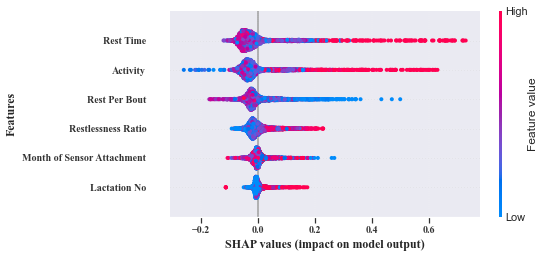

In [47]:
# Setting the figure size
plt.figure(figsize=(12, 10))

# Plotting SHAP summary plot
shap.summary_plot(shap_values, X_train, show=False)

# Setting font style 
plt.rcParams['font.family'] = 'Times New Roman'

# Customising the appearance of the chart
plt.grid(True, linestyle=":", linewidth=0.25)

# Setting ticks, labels
plt.xticks(fontsize=10, weight='bold', fontname='Times New Roman') # Adjust font size here
plt.yticks(fontsize=10, weight='bold', fontname='Times New Roman')  # You can adjust yticks size here
plt.xlabel('SHAP values (impact on model output)', fontsize=12, weight='bold', fontname='Times New Roman')
plt.ylabel('Features', fontsize=12, weight='bold', fontname='Times New Roman')

# Saving the plot to a file
plt.tight_layout(rect=[0, 0, 1, 0.96])
#plt.savefig('shap_summary.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Closing the plot
plt.close()

# Receiver Operating Characteristic Curve (ROC Curve)

## Libraries

In [48]:
# libraries
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc

## Selection of variables

In [49]:
#Selection of variables
X = df[['Activity', 'Rest Time', 'Rest Per Bout', 'Restlessness Ratio', 'Lactation No', 'Month of Sensor Attachment']]
y = df['Calved']

## Data spliting

In [50]:
#Spliting the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4455)

## Training model

In [51]:
# Initializing the classifiers
rf_classifier = RandomForestClassifier()
dt_classifier = DecisionTreeClassifier()
gb_classifier = GradientBoostingClassifier()
nb_classifier = GaussianNB()
nn_classifier = MLPClassifier()

# Training the models
rf_classifier.fit(X_train, y_train)
dt_classifier.fit(X_train, y_train)
gb_classifier.fit(X_train, y_train)
nb_classifier.fit(X_train, y_train)
nn_classifier.fit(X_train, y_train)

MLPClassifier()

## Prediction and calculation of ROC

In [52]:
# Initializing empty dictionaries to store ROC curve data
roc_curves = {}

# Making predictions and calculate ROC curves for each model
classifiers = [
    ("Random Forest", rf_classifier),
    ("Decision Tree", dt_classifier),
    ("Gradient Boosting", gb_classifier),
    ("Naive Bayes", nb_classifier),
    ("Neural Network", nn_classifier)
]

for name, classifier in classifiers:
    y_prob = classifier.predict_proba(X_test)[:, 1]  # Probability of the positive class
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = auc(fpr, tpr)
    roc_curves[name] = (fpr, tpr, auc_score)

#Convert AUC scores to percentages
roc_curves_percentage = {name: (fpr, tpr, round(auc_score * 100)) for name, (fpr, tpr, auc_score) in roc_curves.items()}

## Plotting ROC Curve

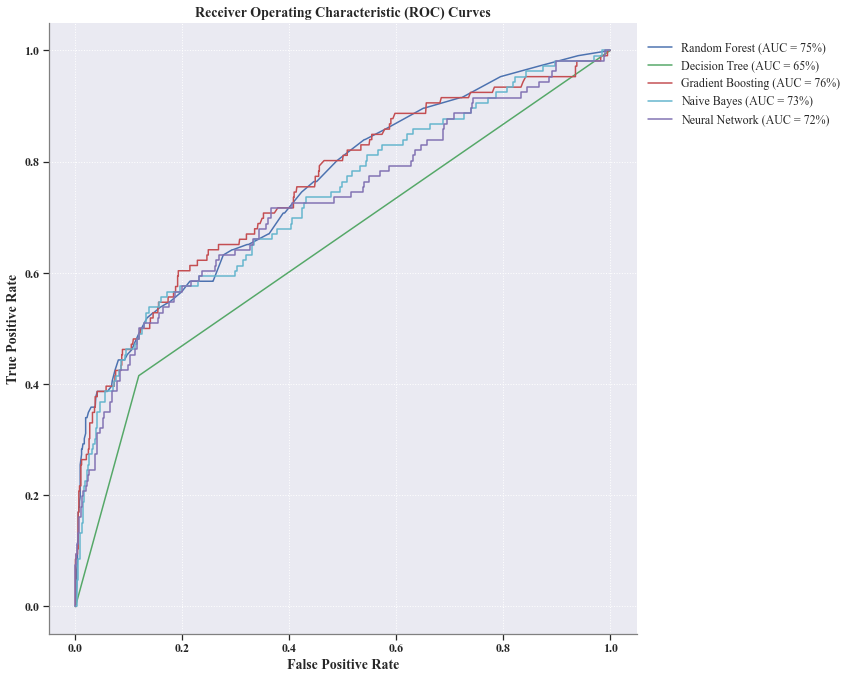

In [53]:
# Defining a list of beautiful colors for the curves
colors = ['b', 'g', 'r', 'c', 'm']

# Setting the figure size
plt.figure(figsize=(12, 10))

for name, (_, _, auc_score) in roc_curves_percentage.items():
    fpr, tpr, _ = roc_curves_percentage[name]
    # Using a unique color for each curve
    color = colors.pop(0)
    plt.plot(fpr, tpr, color, label=f'{name} (AUC = {auc_score}%)')

# Removing the upper and left borders of the chart
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#Setting font style 
plt.rcParams['font.family'] = 'Times New Roman'

# Setting the title, label, and ticks for the chart
plt.xlabel('False Positive Rate', fontsize=14, weight='bold', fontname='Times New Roman')
plt.ylabel('True Positive Rate', fontsize=14, weight='bold', fontname='Times New Roman')
plt.xticks(fontsize=12, weight='bold', fontname='Times New Roman')
plt.yticks(fontsize=12, weight='bold', fontname='Times New Roman')
plt.title('Receiver Operating Characteristic (ROC) Curves', fontsize=14, weight='bold', fontname='Times New Roman')

# Customizing the colors of the borders and ticks
plt.gca().spines['left'].set_color('gray')
plt.gca().spines['bottom'].set_color('gray')
plt.gca().xaxis.set_ticks_position('bottom')
plt.gca().yaxis.set_ticks_position('left')

# Displaying grid for better visualization
plt.grid(True, linestyle=':')

# Setting the legend outside of the chart
plt.legend(loc='center left', bbox_to_anchor=(1, 0.9), prop={'family': 'Times New Roman', 'size': 12}, frameon=False)

#Setting the tight layout for chart
plt.tight_layout()


# Saving the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.savefig('roc_chart.png', dpi=300, bbox_inches='tight')

# Show the chart
plt.show()